## **Table 97. Relevant dependencies for this Chapter**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pandas_datareader.data as web
from pandas_datareader.data import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.optimize import minimize
from statsmodels.stats.diagnostic import linear_lm
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

## **Table 98. Consumer Price Index (CPI) for All Urban Consumers (2000-2025)**


In [2]:
start_date = '1990-01-01'
end_date = '2025-1-01'
inflation_data = DataReader('CPIAUCSL', 'fred', start_date, end_date)
usrec = DataReader('USREC', 'fred', start_date, end_date)

In [8]:
print(usrec.head(25))

            USREC
DATE             
1990-01-01      0
1990-02-01      0
1990-03-01      0
1990-04-01      0
1990-05-01      0
1990-06-01      0
1990-07-01      0
1990-08-01      1
1990-09-01      1
1990-10-01      1
1990-11-01      1
1990-12-01      1
1991-01-01      1
1991-02-01      1
1991-03-01      1
1991-04-01      0
1991-05-01      0
1991-06-01      0
1991-07-01      0
1991-08-01      0
1991-09-01      0
1991-10-01      0
1991-11-01      0
1991-12-01      0
1992-01-01      0


In [7]:
print(inflation_data)

            CPIAUCSL
DATE                
1990-01-01   127.500
1990-02-01   128.000
1990-03-01   128.600
1990-04-01   128.900
1990-05-01   129.100
...              ...
2024-08-01   314.121
2024-09-01   314.686
2024-10-01   315.454
2024-11-01   316.441
2024-12-01   317.685

[420 rows x 1 columns]


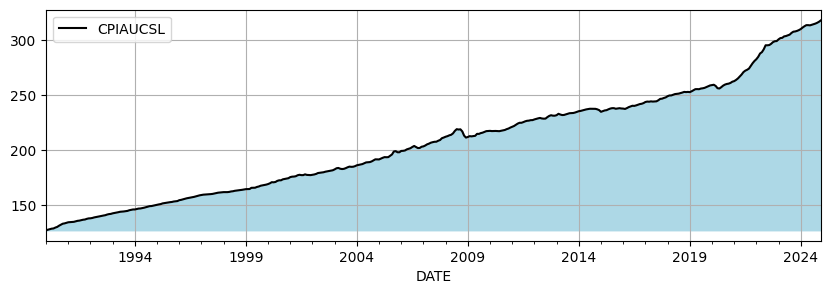

In [5]:
inflation_data.plot(color = 'k', figsize = (10, 3))
plt.grid()
plt.fill_between(inflation_data.index, inflation_data['CPIAUCSL'], inflation_data['CPIAUCSL'].min(), color='lightblue')
plt.show()

## **Table 99. Markov Auto Regression Model**

In [9]:
inflation_data['Inflation'] = np.log(inflation_data['CPIAUCSL']).diff(periods = 12) * 100
inflation_data = inflation_data.resample('MS').last()

model = sm.tsa.MarkovAutoregression(inflation_data['Inflation'].dropna(),
                                           k_regimes = 2,
                                           order = 2,
                                           switching_ar = False)

results = model.fit(method = 'bfgs',
                    maxiter = 1000)
print(results.summary())

                         Markov Switching Model Results                         
Dep. Variable:                Inflation   No. Observations:                  406
Model:             MarkovAutoregression   Log Likelihood                -152.406
Date:                  Fri, 24 Jan 2025   AIC                            318.812
Time:                          04:10:44   BIC                            346.856
Sample:                      01-01-1991   HQIC                           329.911
                           - 12-01-2024                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5144      0.347      7.256      0.000       1.835       3.194
                             Regime 

This warning indicates that the model had to use numerical methods to approximate the covariance matrix because it couldn't be calculated directly. This can sometimes lead to less accurate estimates of the standard errors.

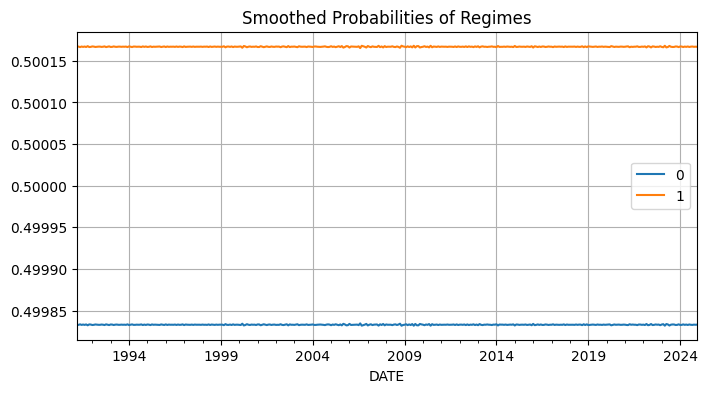

In [10]:
smoothed_probs = results.smoothed_marginal_probabilities
smoothed_probs.plot(title='Smoothed Probabilities of Regimes', figsize=(8,4))
plt.grid()
plt.show()

[2.04192085 2.04328527]


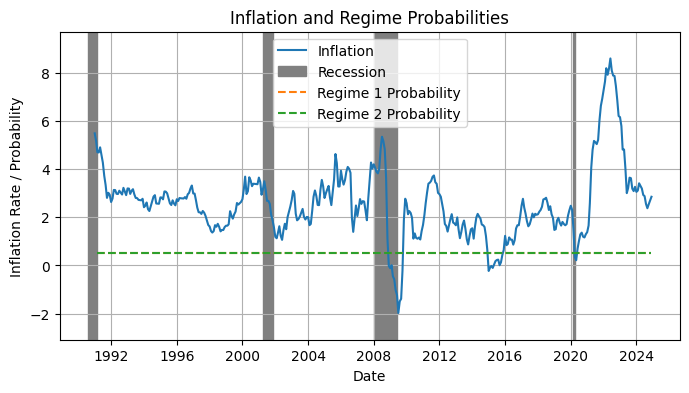

In [11]:
print(results.expected_durations)

fig, ax = plt.subplots(figsize = (8, 4))
ax.plot(inflation_data.index, inflation_data['Inflation'], label = 'Inflation')
ax.fill_between(usrec.index, 0, 1,
                where = usrec['USREC'] == 1,
                color = 'gray',
                transform = ax.get_xaxis_transform(),
                label='Recession')
ax.plot(smoothed_probs.index, smoothed_probs[0], label='Regime 1 Probability', linestyle = '--')
ax.plot(smoothed_probs.index, smoothed_probs[1], label='Regime 2 Probability', linestyle = '--')
ax.set_xlabel('Date')
ax.set_ylabel('Inflation Rate / Probability')
ax.legend(loc = 'upper center')
plt.title('Inflation and Regime Probabilities')
plt.grid()
plt.show()

## **Table 100. Economic variables**

In [ ]:
start_date = '1990-01-01'
end_date = '2025-1-01'

fed_funds = DataReader('FEDFUNDS', 'fred', start_date, end_date)
gdp_growth = DataReader('A191RL1Q225SBEA', 'fred', start_date, end_date)
inflation_data = DataReader('CPIAUCSL', 'fred', start_date, end_date)
unemployment = DataReader('UNRATE', 'fred', start_date, end_date)

fed_funds = fed_funds.resample('MS').last()
gdp_growth = gdp_growth.resample('MS').last()
inflation_data = inflation_data.resample('MS').last()
unemployment = unemployment.resample('MS').last()

inflation_data['Inflation'] = np.log(inflation_data['CPIAUCSL']).diff(periods = 12) * 100

economic_data = pd.DataFrame({
    'FedFunds': fed_funds['FEDFUNDS'],
    'GDPGrowth': gdp_growth['A191RL1Q225SBEA'],
    'Inflation': inflation_data['Inflation'],
    'Unemployment': unemployment['UNRATE']})

economic_data = economic_data.dropna()
print(economic_data.head())

            FedFunds  GDPGrowth  Inflation  Unemployment
DATE                                                    
1991-01-01      6.91       -1.9   5.493372           6.4
1991-04-01      5.91        3.2   4.697834           6.7
1991-07-01      5.82        2.0   4.275117           6.8
1991-10-01      5.21        1.4   2.808758           7.0
1992-01-01      4.03        4.9   2.637516           7.3


In [ ]:
economic_data.replace([np.inf, -np.inf], np.nan, inplace=True)
economic_data.dropna(inplace=True)
economic_data.shape

(135, 4)

## **Table 101. ACF and PACF plots to select order**

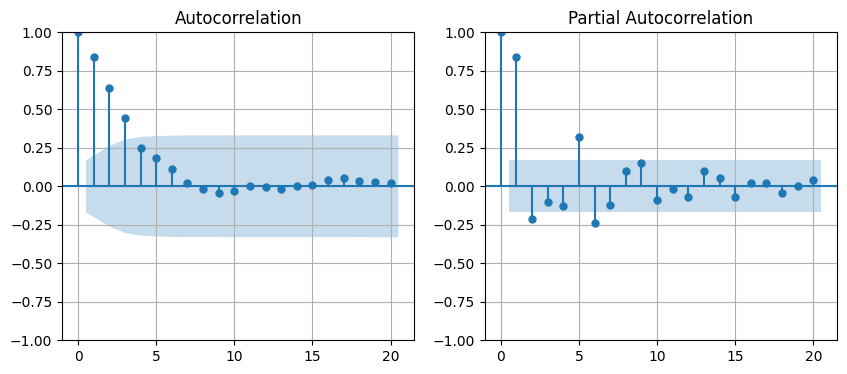

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
plot_acf(economic_data['Inflation'], lags = 20, ax = ax1)
ax1.grid()
plot_pacf(economic_data['Inflation'], lags = 20, ax = ax2)
ax2.grid()
plt.show()

## **Table 102. Parameters (regime, order) tuning and best model fit**

In [ ]:
best_aic = np.inf
best_model = None
best_k_regimes = None
best_order = None

for k_regimes in range(2, 5):
    for order in range(1, 5):
        model = sm.tsa.MarkovAutoregression(
            economic_data['Inflation'].dropna(),
            k_regimes = k_regimes,
            order = order,
            switching_ar = False,
            exog = economic_data[['FedFunds', 'GDPGrowth', 'Unemployment']].dropna())
        results = model.fit(method = 'lbfgs', maxiter = 10000, disp = False)

        if results.aic < best_aic:
            best_aic = results.aic
            best_model = results
            best_k_regimes = k_regimes
            best_order = order

print("Best AIC:", best_aic)
print("Best K Regimes:", best_k_regimes)
print("Best Order:", best_order)
print(best_model.summary())

Best AIC: 291.61652198194037
Best K Regimes: 2
Best Order: 2
                         Markov Switching Model Results                         
Dep. Variable:                Inflation   No. Observations:                  133
Model:             MarkovAutoregression   Log Likelihood                -135.808
Date:                  Fri, 17 Jan 2025   AIC                            291.617
Time:                          06:04:47   BIC                            320.520
Sample:                      01-01-1991   HQIC                           303.362
                           - 07-01-2024                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3995      0.672      6.549      0.000

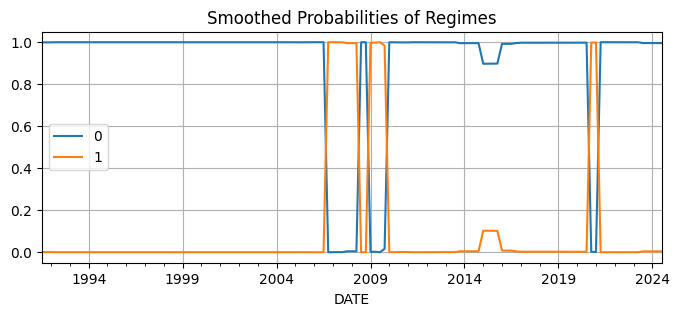

In [ ]:
smoothed_probs = best_model.smoothed_marginal_probabilities
smoothed_probs.plot(title='Smoothed Probabilities of Regimes', figsize=(8,3))
plt.grid()
plt.show()

[39.81444593  4.24505319]


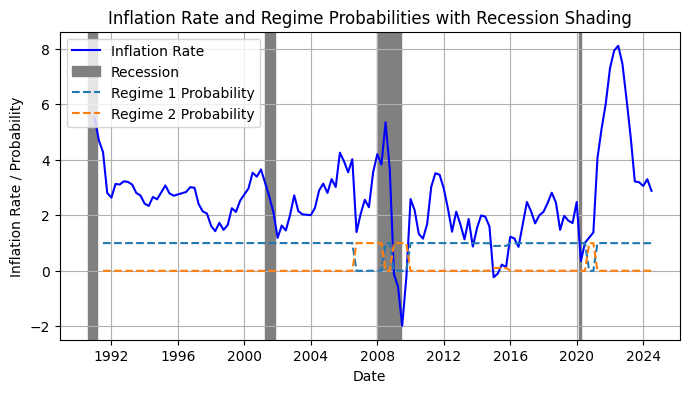

In [ ]:
expected_durations = best_model.expected_durations

print(expected_durations)

fig, ax = plt.subplots(figsize = (8, 4))
ax.plot(economic_data.index,
        economic_data['Inflation'],
        label = 'Inflation Rate',
        color = 'blue')

ax.fill_between(
    usrec.index,
    economic_data['Inflation'].min(),
    economic_data['Inflation'].max(),
    where = usrec['USREC'] == 1,
    color = 'gray',
    transform =ax.get_xaxis_transform(),
    label = 'Recession')


for i in range(best_model.k_regimes):
    ax.plot(
        smoothed_probs.index,
        smoothed_probs[i],
        label = f'Regime {i + 1} Probability',
        linestyle = '--')

ax.legend(loc='upper left')
ax.set_title('Inflation Rate and Regime Probabilities with Recession Shading')
ax.set_xlabel('Date')
ax.set_ylabel('Inflation Rate / Probability')
ax.grid(True)
plt.show()

## **Table 103. Ingest relevant dataset and perform necessary data processing**

In [ ]:
start_date = '1990-01-01'
end_date = '2025-01-01'
gdp_data = DataReader('GDPC1', 'fred', start_date, end_date)
unemployment = DataReader('UNRATE', 'fred', start_date, end_date)
inflation = DataReader('CPIAUCSL', 'fred', start_date, end_date)
interest_rate = DataReader('GS10', 'fred', start_date, end_date)
recession = DataReader('USREC', 'fred', start_date, end_date)

gdp_data = gdp_data.resample('QS').last()
gdp_data['GrowthRate'] = gdp_data['GDPC1'].pct_change() * 100
gdp_data.dropna(inplace=True)
unemployment = unemployment.resample('QS').last()
inflation = inflation.resample('QS').last()
interest_rate = interest_rate.resample('QS').last()
recession = recession.resample('QS').last()

data = pd.merge(gdp_data[['GrowthRate']], unemployment, left_index=True, right_index=True)
data = pd.merge(data, inflation, left_index=True, right_index=True)
data = pd.merge(data, interest_rate, left_index=True, right_index=True)
data = pd.merge(data, recession, left_index=True, right_index=True)
data.rename(columns={'GS10': 'InterestRate', 'CPIAUCSL': 'Inflation', 'UNRATE': 'Unemployment'}, inplace=True)

data['LaggedGrowthRate'] = data['GrowthRate'].shift(1)
data['LaggedUnemployment'] = data['Unemployment'].shift(1)
data['LaggedInflation'] = data['Inflation'].shift(1)
data['LaggedInterestRate'] = data['InterestRate'].shift(1)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
print(data.tail())

            GrowthRate  Unemployment  Inflation  InterestRate  USREC  \
DATE                                                                   
2023-07-01    1.071523           3.8    307.288          4.38      0   
2023-10-01    0.788673           3.8    308.742          4.02      0   
2024-01-01    0.404802           3.9    312.230          4.21      0   
2024-04-01    0.738980           4.1    313.049          4.31      0   
2024-07-01    0.759510           4.1    314.686          3.72      0   

            LaggedGrowthRate  LaggedUnemployment  LaggedInflation  \
DATE                                                                
2023-07-01          0.606974                 3.6          304.003   
2023-10-01          1.071523                 3.8          307.288   
2024-01-01          0.788673                 3.8          308.742   
2024-04-01          0.404802                 3.9          312.230   
2024-07-01          0.738980                 4.1          313.049   

           

## **Table 104. Recession Model**

                         Markov Switching Model Results                         
Dep. Variable:               GrowthRate   No. Observations:                  135
Model:             MarkovAutoregression   Log Likelihood                -206.052
Date:                  Fri, 17 Jan 2025   AIC                            432.105
Time:                          06:14:23   BIC                            461.157
Sample:                      07-01-1990   HQIC                           443.911
                           - 07-01-2024                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6209      1.031     -0.602      0.547      -2.641       1.399
                             Regime 

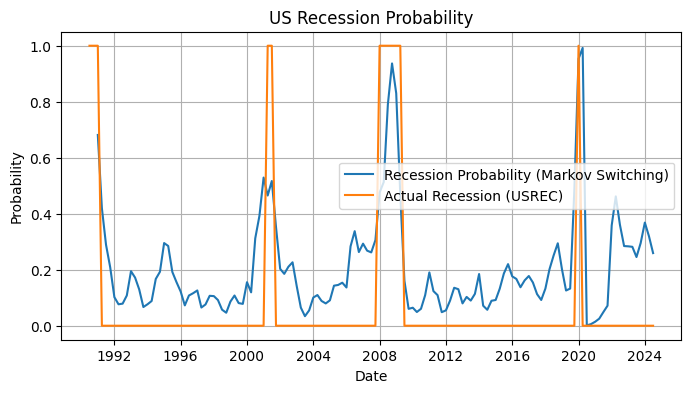

In [ ]:
model = sm.tsa.MarkovAutoregression(
    data['GrowthRate'],
    k_regimes = 2,
    order = 2,
    switching_ar = False,
    exog = data[['Unemployment', 'Inflation', 'InterestRate']])
results = model.fit(method = 'lbfgs', maxiter=1000)

print(results.summary())

recession_probs = results.smoothed_marginal_probabilities[0]
recession_probs = recession_probs.reindex(data.index, method='pad')

plt.figure(figsize = (8, 4))
plt.plot(data.index, recession_probs, label = 'Recession Probability (Markov Switching)')
plt.plot(data.index, data['USREC'], label = 'Actual Recession (USREC)')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.title('US Recession Probability')
plt.legend()
plt.grid()
plt.show()

## **Table 105. TAR model**

In [ ]:
start_date = '1990-01-01'
end_date = '2025-1-01'

usrec = DataReader('USREC', 'fred', start_date, end_date)
inflation_data = DataReader('CPIAUCSL', 'fred', start_date, end_date)
unemployment = DataReader('UNRATE', 'fred', start_date, end_date)

inflation_data = inflation_data.resample('MS').last()
inflation_data['Inflation'] = np.log(inflation_data['CPIAUCSL']).diff(periods=12) * 100
unemployment = unemployment.resample('MS').last()
usrec = usrec.resample('MS').last()

data = pd.merge(inflation_data[['Inflation']], unemployment, left_index=True, right_index=True)
data.rename(columns={'UNRATE': 'UnemploymentRate'}, inplace=True)
data.dropna(inplace=True)

threshold_variable = 'UnemploymentRate'
threshold_value = 5

# Dummy variable for regimes
data['Regime'] = (data[threshold_variable] > threshold_value).astype(int)

# TAR model
model = sm.tsa.MarkovAutoregression(
    data['Inflation'], k_regimes=2, order=2, switching_ar=False, exog = data[['Regime']])
results = model.fit()
print(results.summary())

                         Markov Switching Model Results                         
Dep. Variable:                Inflation   No. Observations:                  406
Model:             MarkovAutoregression   Log Likelihood                -152.396
Date:                  Fri, 17 Jan 2025   AIC                            320.792
Time:                          06:25:26   BIC                            352.843
Sample:                      01-01-1991   HQIC                           333.477
                           - 12-01-2024                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5082      0.352      7.119      0.000       1.818       3.199
                             Regime 

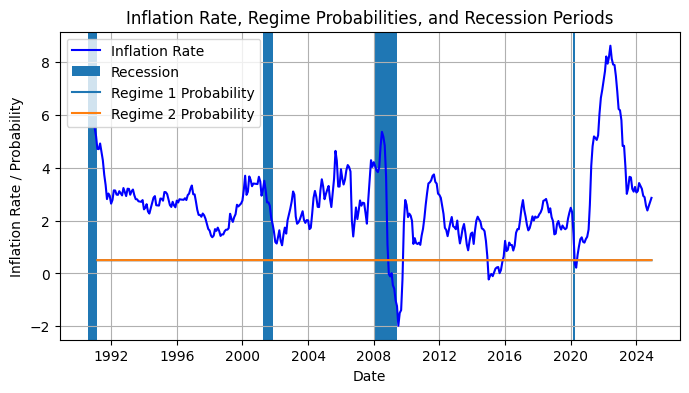

In [ ]:
smoothed_probs = results.smoothed_marginal_probabilities

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(data.index, data['Inflation'], label='Inflation Rate', color='blue')

ax.fill_between(
    usrec.index,
    data['Inflation'].min(),
    data['Inflation'].max(),
    where=usrec['USREC'] == 1,
    transform=ax.get_xaxis_transform(),
    label='Recession')

ax.plot(
    smoothed_probs.index,
    smoothed_probs[0],
    label='Regime 1 Probability')
ax.plot(
    smoothed_probs.index,
    smoothed_probs[1],
    label='Regime 2 Probability')

ax.legend(loc='upper left')
ax.set_title('Inflation Rate, Regime Probabilities, and Recession Periods')
ax.set_xlabel('Date')
ax.set_ylabel('Inflation Rate / Probability')
ax.grid(True)
plt.show()

## **Table 106. Exploratory analysis**

In [ ]:
start_date = '1990-01-01'
end_date = '2023-01-01'
gdp_data = DataReader('GDPC1', 'fred', start_date, end_date)
interest_rate = DataReader('GS10', 'fred', start_date, end_date)

gdp_data = gdp_data.resample('QS').last()
gdp_data['GrowthRate'] = gdp_data['GDPC1'].pct_change() * 100
gdp_data.dropna(inplace=True)

interest_rate = interest_rate.resample('QS').last()
interest_rate.dropna(inplace=True)

data = pd.merge(gdp_data[['GrowthRate']], interest_rate, left_index=True, right_index=True)
data.rename(columns={'GS10': 'InterestRate'}, inplace=True)

data['LaggedGDPGrowth'] = data['GrowthRate'].shift(1)
data['LaggedInterestRate'] = data['InterestRate'].shift(1)
data.dropna(inplace=True)

dependent_var = data['GrowthRate']
transition_var1 = data['LaggedGDPGrowth']
transition_var2 = data['LaggedInterestRate']

def linearity_test(y, x):
    x_squared = x**2
    x_cubed = x**3
    x_augmented = pd.concat([x, x_squared, x_cubed], axis=1)
    x_augmented.columns = ['x', 'x_squared', 'x_cubed']

    x_augmented = sm.add_constant(x_augmented)
    model = sm.OLS(y, x_augmented).fit()

    test_result = model.f_test("x_squared = 0, x_cubed = 0")
    return test_result

print("Linearity Test for Lagged GDP Growth Rate:")
test_result1 = linearity_test(dependent_var, transition_var1)
print(test_result1)
print("\n")
print("Linearity Test for Lagged Interest Rate:")
test_result2 = linearity_test(dependent_var, transition_var2)
print(test_result2)
correlation1 = dependent_var.corr(transition_var1)
correlation2 = dependent_var.corr(transition_var2)
print("\nCorrelation between GDP Growth Rate and Lagged GDP Growth Rate:", correlation1)
print("Correlation between GDP Growth Rate and Lagged Interest Rate:", correlation2)

Linearity Test for Lagged GDP Growth Rate:
<F test: F=44.025305320603906, p=2.9867790440303986e-15, df_denom=127, df_num=2>


Linearity Test for Lagged Interest Rate:
<F test: F=2.321110779205665, p=0.10231537680068598, df_denom=127, df_num=2>

Correlation between GDP Growth Rate and Lagged GDP Growth Rate: -0.13988109060949644
Correlation between GDP Growth Rate and Lagged Interest Rate: 0.038490417391878175


## **Table 107. STAR model implementation using custom code**

Estimated parameters: [  -8.70213776    0.67659318 -621.05255812  -77.01202124  623.00033786
   76.85943096]


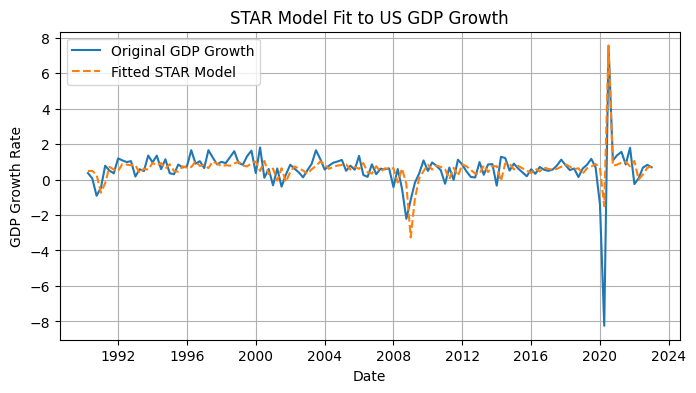

In [ ]:
start_date = '1990-01-01'
end_date = '2025-01-01'
gdp_data = DataReader('GDPC1', 'fred', start_date, end_date)

gdp_data = gdp_data.resample('QS').last()
gdp_data['GrowthRate'] = np.log(gdp_data['GDPC1']/gdp_data['GDPC1'].shift(1)) * 100
gdp_data.dropna(inplace=True)

y = gdp_data['GrowthRate'].values
lagged_y = np.roll(y, 1)
lagged_y[0] = lagged_y[1]

def logistic_transition(c, gamma, z):
    return 1 / (1 + np.exp(-gamma * (z - c)))

def star_model(params, y, lagged_y, z):
    c, gamma, phi0, phi1, theta0, theta1 = params
    G = logistic_transition(c, gamma, z)
    y_hat = (phi0 + phi1 * lagged_y) + G * (theta0 + theta1 * lagged_y)
    return y_hat

# Fit the model using nonlinear least squares
initial_params = [np.mean(lagged_y), 0.1, 1, 0.5, 1, 0.5]
res = minimize(lambda params: np.sum((star_model(params, y, lagged_y, lagged_y) - y) ** 2), initial_params)

print("Estimated parameters:", res.x)

y_pred = star_model(res.x, y, lagged_y, lagged_y)

plt.figure(figsize=(8, 4))
plt.plot(gdp_data.index, y, label='Original GDP Growth')
plt.plot(gdp_data.index, y_pred, '--', label='Fitted STAR Model')
plt.xlabel('Date')
plt.ylabel('GDP Growth Rate')
plt.title('STAR Model Fit to US GDP Growth')
plt.legend()
plt.grid()
plt.show()

In [ ]:
stationarity_test(gdp_data['GrowthRate'], 'GDP Growth Rate')


GDP Growth Rate Stationarity Test:
ADF Statistic: -13.00644510035205
p-value: 2.621747534831786e-24
Stationary


Estimated parameters: [-2.99182640e+00  1.19666973e-01 -3.24139537e+02 -1.94925584e+01
  5.50867153e+02  7.26500263e+00]


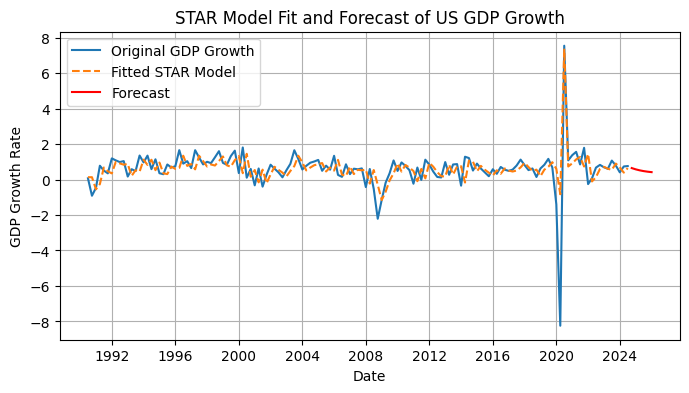

In [ ]:
start_date = '1990-01-01'
end_date = '2025-01-01'
gdp_data = DataReader('GDPC1', 'fred', start_date, end_date)

gdp_data = gdp_data.resample('QS').last()
gdp_data['GrowthRate'] = np.log(gdp_data['GDPC1']/gdp_data['GDPC1'].shift(1)) * 100
gdp_data.dropna(inplace=True)

gdp_data = gdp_data.resample('QS').last()
gdp_data['GrowthRate'] = np.log(gdp_data['GDPC1'] / gdp_data['GDPC1'].shift(1)) * 100
gdp_data.dropna(inplace=True)

y = gdp_data['GrowthRate'].values
lagged_y = np.roll(y, 1)
lagged_y[0] = lagged_y[1]

def logistic_transition(c, gamma, z):
    return 1 / (1 + np.exp(-gamma * (z - c)))

def star_model(params, y, lagged_y, z):
    c, gamma, phi0, phi1, theta0, theta1 = params
    G = logistic_transition(c, gamma, z)
    y_hat = (phi0 + phi1 * lagged_y) + G * (theta0 + theta1 * lagged_y)
    return y_hat

initial_params = [np.mean(lagged_y), 0.1, 1, 0.5, 1, 0.5]
res = minimize(lambda params: np.sum((star_model(params, y, lagged_y, lagged_y) - y) ** 2), initial_params)

print("Estimated parameters:", res.x)

forecast_periods = 6
lagged_y_forecast = np.concatenate([lagged_y[-1:], np.zeros(forecast_periods)])

y_forecast = []
for i in range(forecast_periods):
    lagged_y_forecast[i+1] = star_model(res.x, y, lagged_y_forecast[i:i+1], lagged_y_forecast[i:i+1])[0]
    y_forecast.append(lagged_y_forecast[i+1])


y_pred = star_model(res.x, y, lagged_y, lagged_y)

plt.figure(figsize = (8, 4))
plt.plot(gdp_data.index, y, label='Original GDP Growth')
plt.plot(gdp_data.index, y_pred, '--', label='Fitted STAR Model')

forecast_index = pd.date_range(gdp_data.index[-1], periods=forecast_periods+1, freq = 'QS')[1:]
plt.plot(forecast_index, y_forecast, label='Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('GDP Growth Rate')
plt.title('STAR Model Fit and Forecast of US GDP Growth')
plt.legend()
plt.grid()
plt.show()

Estimated parameters: [-1.58798881e+00  7.94947655e+01  4.04959851e+00  5.04635818e-01
 -4.10476239e+00 -3.11865215e-01  3.22885516e-02 -3.84851673e-02]


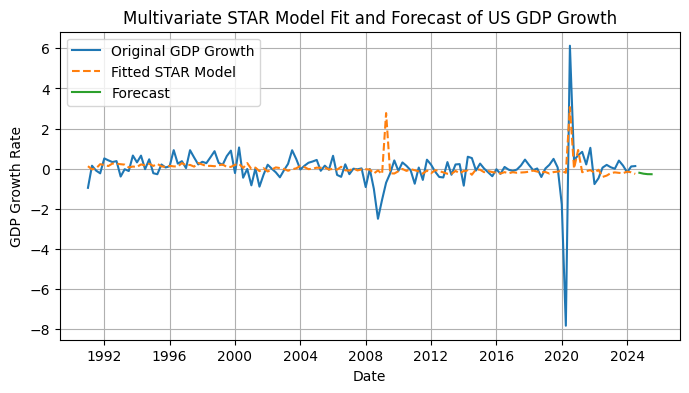

In [ ]:
# Fetch and prepare the data
start_date = '1990-01-01'
end_date = '2025-01-01'
gdp_data = DataReader('GDPC1', 'fred', start_date, end_date)
interest_rate_data = DataReader('GS10', 'fred', start_date, end_date)
inflation_data = DataReader('CPIAUCSL', 'fred', start_date, end_date)

# Resample to quarterly frequency
gdp_data = gdp_data.resample('QS').last()
interest_rate_data = interest_rate_data.resample('QS').last()
inflation_data = inflation_data.resample('QS').last()

# Calculate GDP growth rate
gdp_data['GrowthRate'] = np.log(gdp_data['GDPC1'] / gdp_data['GDPC1'].shift(1)) * 100

# Merge data into a single DataFrame
data = pd.merge(gdp_data[['GrowthRate']], interest_rate_data, left_index=True, right_index=True)
data = pd.merge(data, inflation_data, left_index=True, right_index=True)
data.rename(columns={'GS10': 'InterestRate', 'CPIAUCSL': 'Inflation'}, inplace=True)

# Create lagged variables
data['LaggedGDPGrowth'] = data['GrowthRate'].shift(1)
data['LaggedInterestRate'] = data['InterestRate'].shift(1)
data['LaggedInflation'] = data['Inflation'].shift(1)
data.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
cols_to_scale = ['GrowthRate', 'InterestRate', 'Inflation', 'LaggedGDPGrowth', 'LaggedInterestRate', 'LaggedInflation']
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

# Define the logistic transition function
def logistic_transition(c, gamma, z):
    return 1 / (1 + np.exp(-gamma * (z - c)))

def multivariate_star_model(params, y, lagged_y, z, exog):
    c, gamma, phi0, phi1, theta0, theta1, beta1, beta2 = params
    G = logistic_transition(c, gamma, z)

    # Check if exog is 1-dimensional and reshape if necessary
    if exog.ndim == 1:
        exog = exog.reshape(1, -1)

    y_hat = (phi0 + phi1 * lagged_y + exog[:, 0] * beta1 + exog[:, 1] * beta2) + \
            G * (theta0 + theta1 * lagged_y + exog[:, 0] * beta1 + exog[:, 1] * beta2)
    return y_hat

y = data['GrowthRate'].values
lagged_y = data['LaggedGDPGrowth'].values
transition_variable = data['LaggedGDPGrowth'].values # Using Lagged GDP Growth as transition variable
exog_vars = data[['LaggedInterestRate', 'LaggedInflation']].values

initial_params = [np.mean(lagged_y), 0.1, 1, 0.5, 1, 0.5, 0, 0]  # Initial parameters

res = minimize(lambda params: np.sum((multivariate_star_model(params, y[1:-1], lagged_y[1:-1], transition_variable[1:-1], exog_vars[:-2]) - y[2:]) ** 2),
               initial_params)

print("Estimated parameters:", res.x)

num_bootstraps = 1000
forecast_periods = 4
forecast_samples = np.zeros((num_bootstraps, forecast_periods))

for i in range(num_bootstraps):
    residuals = y[2:] - multivariate_star_model(res.x, y[1:-1], lagged_y[1:-1], transition_variable[1:-1], exog_vars[:-2])
    resampled_residuals = np.random.choice(residuals, size=len(residuals), replace=True)
    y_bootstrapped = multivariate_star_model(res.x, y[1:-1], lagged_y[1:-1], transition_variable[1:-1], exog_vars[:-2]) + resampled_residuals
    lagged_y_forecast = np.concatenate([lagged_y[-1:], np.zeros(forecast_periods)])
    exog_forecast = data[['LaggedInterestRate', 'LaggedInflation']].values[-forecast_periods - 1:-1]
    y_forecast_bootstrap = []
    for j in range(forecast_periods):
        lagged_y_forecast[j + 1] = multivariate_star_model(res.x, y_bootstrapped, lagged_y_forecast[j:j + 1], lagged_y_forecast[j:j + 1], exog_forecast[j])[0]
        y_forecast_bootstrap.append(lagged_y_forecast[j + 1])
    forecast_samples[i, :] = y_forecast_bootstrap

y_pred = multivariate_star_model(res.x, y[1:-1], lagged_y[1:-1], transition_variable[1:-1], exog_vars[:-2])
lagged_y_forecast = np.concatenate([lagged_y[-1:], np.zeros(forecast_periods)])
exog_forecast = data[['LaggedInterestRate', 'LaggedInflation']].values[-forecast_periods - 1:]
y_forecast = []
for i in range(forecast_periods):
    lagged_y_forecast[i + 1] = multivariate_star_model(res.x, y, lagged_y_forecast[i:i + 1], lagged_y_forecast[i:i + 1], exog_forecast[i])[0]
    y_forecast.append(lagged_y_forecast[i + 1])

plt.figure(figsize=(8, 4))
plt.plot(data.index[2:], y[2:], label='Original GDP Growth')
plt.plot(data.index[2:], y_pred, '--', label='Fitted STAR Model')

forecast_index = pd.date_range(data.index[-1], periods=forecast_periods + 1, freq='QS')[1:]
plt.plot(forecast_index, y_forecast, label='Forecast')

plt.xlabel('Date')
plt.ylabel('GDP Growth Rate')
plt.title('Multivariate STAR Model Fit and Forecast of US GDP Growth')
plt.legend()
plt.grid()
plt.show()